In [1]:
%matplotlib inline

In [15]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import librosa as lb
from librosa.display import specshow
import torch
import matplotlib.pyplot as plt

In [10]:
x, sr = lb.load("data/blues/blues.00000.wav", sr=4000)
x, sr

(array([ 0.01029962, -0.01902165, -0.02502744, ...,  0.01392666,
         0.00220094,  0.        ], dtype=float32),
 4000)

In [4]:
y, sr = lb.load("data/blues/blues.00000.wav")
y, sr

(array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
        -0.06106567, -0.06417847], dtype=float32),
 22050)

In [5]:
z, sr = lb.load("data/blues/blues.00001.wav")
z

array([ 0.00341797,  0.00430298,  0.00137329, ..., -0.11953735,
       -0.17495728, -0.15118408], dtype=float32)

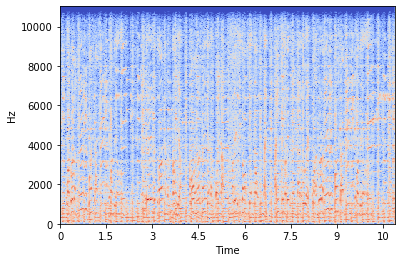

In [6]:
spec = lb.amplitude_to_db(np.abs(lb.stft(x)))
specshow(spec, x_axis="time", y_axis='linear')

In [7]:
lb.stft(x, n_fft=1024).shape

(513, 938)

In [8]:
lb.stft(y).shape

(1025, 1293)

In [9]:
lb.stft(z).shape

(1025, 1293)

In [12]:
12000%6

0

In [72]:
clips = np.split(x, 6)

In [73]:
[lb.stft(clip, n_fft=1024).shape for clip in clips]

[(513, 79), (513, 79), (513, 79), (513, 79), (513, 79), (513, 79)]

In [9]:
x_downsampled = lb.resample(x, sr, 4000)


In [10]:
x_downsampled.shape

(120054,)

In [11]:
lb.stft(x_downsampled).shape

(1025, 235)

In [96]:
subdirs = next(os.walk("data/"))[1]
subdirs

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [95]:
labels

[]

In [83]:
glob.glob("data/*")

['data\\bextract_single.mf',
 'data\\bl.mf',
 'data\\blues',
 'data\\cl.mf',
 'data\\classical',
 'data\\co.mf',
 'data\\country',
 'data\\di.mf',
 'data\\disco',
 'data\\hi.mf',
 'data\\hiphop',
 'data\\input.mf',
 'data\\ja.mf',
 'data\\jazz',
 'data\\me.mf',
 'data\\metal',
 'data\\po.mf',
 'data\\pop',
 'data\\re.mf',
 'data\\reggae',
 'data\\ro.mf',
 'data\\rock']

In [14]:
subdirs = next(os.walk("data/"))[1]
dims = []
for sub in subdirs:
        folder = os.path.join("data", sub, "*")
        paths = glob.glob(folder)
        for path in paths:
            dims.append(lb.load(path, sr=4000)[0].shape)
dims = pd.Series(dims)

NameError: name 'pd' is not defined

In [16]:
dims = pd.Series(dims)

In [22]:
dims = dims.str[0].astype(int)

In [24]:
dims.max()

122596

In [25]:
122596 % 6

4

In [29]:
122598 % 6

0